# Finding Lines

In [19]:
# load helper functions
%run -i "0. Functions_Clases Pipeline.py"

# Load Camera calibration params
[warped_images, M_values, Minv_values ] = pickle.load(open( "pickle_data/warped_images_params.p", "rb" ) )

[NbConvertApp] Converting notebook 0. Functions_Clases Pipeline.ipynb to script
[NbConvertApp] Writing 19941 bytes to 0. Functions_Clases Pipeline.py


<Figure size 432x288 with 0 Axes>

###  find_x_lane_line_points

In [20]:
# Test function
currentIndex= 3
warped_image = warped_images[currentIndex]

# Instanciate cLine classes
lineLeft = Line()
lineRight = Line()

# Find x line poitns based on histogram values
leftx_base, rightx_base  = find_lane_x_points(warped_image)

lineLeft.updateXbase(leftx_base)
lineRight.updateXbase(rightx_base)

pprint(vars(lineLeft))
#pprint(vars(lineRight))

{'allx': None,
 'ally': None,
 'bestx': 447,
 'currentx': 447,
 'detected': False,
 'line_base_pos': None,
 'missdetections': 0,
 'poly_best_fit': array([False]),
 'poly_current_fit': array([False]),
 'poly_diffs': array([False]),
 'poly_plotx': array([False]),
 'poly_ploty': array([False]),
 'radius_of_curvature': None,
 'recent_xfitted': [447]}


###  find_lane_pixels

{'allx': array([432, 433, 434, ..., 475, 476, 477], dtype=int64),
 'ally': array([648, 648, 648, ..., 719, 719, 719], dtype=int64),
 'bestx': 447,
 'currentx': 447,
 'detected': False,
 'line_base_pos': None,
 'missdetections': 0,
 'poly_best_fit': array([False]),
 'poly_current_fit': array([False]),
 'poly_diffs': array([False]),
 'poly_plotx': array([False]),
 'poly_ploty': array([False]),
 'radius_of_curvature': None,
 'recent_xfitted': [447]}


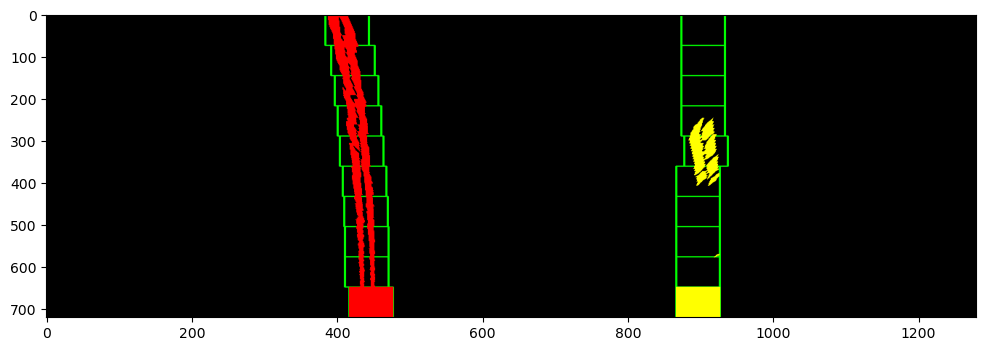

In [21]:
# Test Function
leftx, lefty, rightx, righty, out_img = find_lane_pixels(warped_image,lineLeft.bestx, lineRight.bestx)

lineLeft.updatePixels(leftx, lefty)
lineRight.updatePixels(rightx, righty)

displayListImages([out_img],cols=1,cmap='gray',figSize=[12,4])

pprint(vars(lineLeft))
#pprint(vars(lineRight))

### [function] fit_polynomial

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

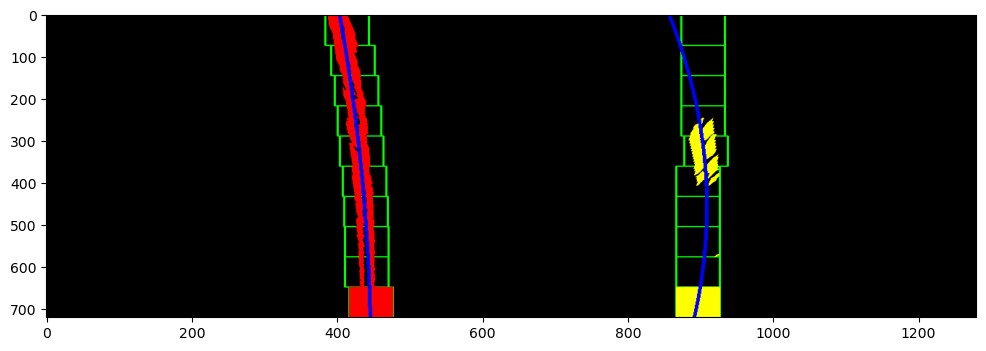

In [22]:
# Test function
coeffs_fit, lineDetected, left_fitx, ploty, img_line  = fit_polynomial(out_img, lineLeft.allx, lineLeft.ally)
lineLeft.updateCoeffsLine(lineDetected, coeffs_fit, left_fitx, ploty)

coeffs_fit, lineDetected, right_fitx, ploty, img_line  = fit_polynomial(out_img, lineRight.allx, lineRight.ally)
lineRight.updateCoeffsLine(lineDetected, coeffs_fit,right_fitx,ploty)

displayListImages([img_line],cols=1,figSize=[12,4])

### [function]rightSeparation

In [23]:
rightSeparation(left_fitx, right_fitx)

True

### [function] areParallel

## Dump data

In [24]:
pickle.dump( [lineLeft, lineRight ], open( "pickle_data/lines_lane.p", "wb" ) )